1.	Загрузите данные в ноутбук

In [1]:
file = 'data/Вариант 1.csv'

In [3]:
import numpy as np
data = np.loadtxt(open(file,'rt').readlines()[:-1],skiprows = 3,delimiter = ',',dtype=(str))
data[:5]

array([['1', '117', '11', 'М', '341', '1+++--1+-++---0---------0',
        '0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)', '', '8',
        '20', '24'],
       ['2', '148', '12А', 'М', '338', '1+---+0--+---+0----++-+-0',
        '0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)', '', '8',
        '20', '24'],
       ['3', '152', '13', 'Ж', '104', '2-----0--+----1---------1',
        '0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1)', '', '9',
        '22', '24'],
       ['4', '152', '13', 'М', '104', '1+--+-0++-----2----++---0',
        '0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)', '', '9',
        '22', '24'],
       ['5', '132', '11', 'М', '337', '1++---0-+++---1----+----2',
        '0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)', '', '10',
        '24', '24']], dtype='<U48')

In [134]:
header = np.loadtxt(open(file,'rt').readlines()[:3],delimiter = ',',dtype=(str),skiprows = 0)
if 'Русский язык' in header[0][0]:
    grades = [23,56,71]
if 'Математика' in header[0][0]:
    grades = [24,46,64]
header

array([['01-Русский язык', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', ''],
       ['№', '№ школы', 'Класс', 'Пол', 'Номер варианта',
        'Задания с кратким ответом', 'Задания с развёрнутым ответом',
        'Устная часть', 'Первичный балл', 'Балл', 'Минимальный балл']],
      dtype='<U29')

2.	Сделайте описательную статистику по набранному баллу

In [135]:
from scipy import stats

In [136]:
descriptive_stats = stats.describe(data[:,9].astype(int))
descriptive_stats

DescribeResult(nobs=3048, minmax=(20, 100), mean=72.76902887139107, variance=186.7297001396322, skewness=-0.3536081528968018, kurtosis=-0.04222325713421471)

3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [137]:
data[data[:,9].astype(int)<descriptive_stats.mean].shape[0]/data.shape[0]

0.5127952755905512

4.	Найти процент учащихся не сдавших экзамен

In [138]:
bad_mark = data[data[:,9].astype(int)<data[:,10].astype(int)].shape[0]/data.shape[0]
bad_mark

0.0013123359580052493

5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

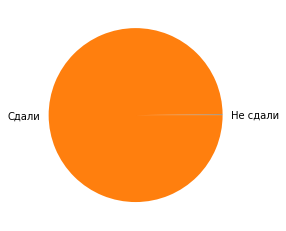

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie([bad_mark,1-bad_mark],labels = ['Не сдали','Сдали'])
plt.show()

6.	Постройте ядерную оценку плотности распределению баллов за экзамен

<AxesSubplot:ylabel='Density'>

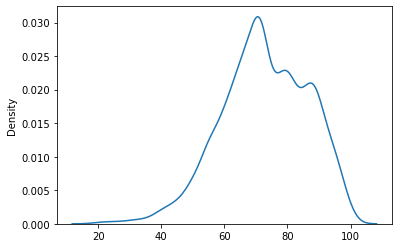

In [140]:
sns.kdeplot(data[:,9].astype(int))

7.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [141]:
scores = data[:,9].astype(int)
neud = (scores < grades[0]).sum()/scores.shape[0]
ud = ((scores > grades[0]) & (scores <= grades[1])).sum()/scores.shape[0]
hor = ((scores > grades[1]) & (scores <= grades[2])).sum()/scores.shape[0]
otl = (scores > grades[2]).sum()/scores.shape[0]

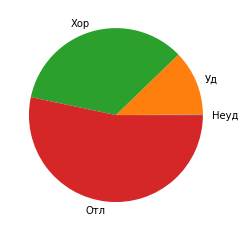

In [142]:
plt.pie([neud,ud,hor,otl],labels = ['Неуд','Уд','Хор','Отл'])
plt.show()

8.	Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [143]:
man = (data[:,3] =='М').sum()/data[:,3].shape[0]
woman = 1-man
man,woman

(0.4202755905511811, 0.579724409448819)

9.	Сколько школ принимало участие в экзамене?

In [144]:
len(list(set(data[:,1].tolist())))

24

1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [7]:
mylen = np.vectorize(len)
short = mylen(data[:,5])[0]
short

25

In [8]:
long = int(mylen(data[:,6])[0]/4)
long

12

In [147]:
data[:,6]

array(['0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)',
       '0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)',
       '0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1)', ...,
       '1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1)',
       '1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1)',
       '1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1)'], dtype='<U48')

2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [148]:
def b_score(data,number):
    scores = np.array([x[number-1] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 2


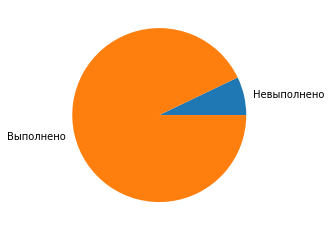

(0.9288057742782152, 0.07119422572178477)

In [149]:
b_score(data[:,5],2)

In [150]:
def b_all_scores(data):
    res_arr = []
    for i in range(short):
        scores = np.array([x[i] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [151]:
b_all_scores(data[:,5])

[(0.9868766404199475, 0.013123359580052493),
 (0.9288057742782152, 0.07119422572178477),
 (0.8733595800524935, 0.12664041994750655),
 (0.7729658792650919, 0.22703412073490814),
 (0.5895669291338583, 0.4104330708661417),
 (0.9061679790026247, 0.09383202099737532),
 (0.9504593175853019, 0.04954068241469816),
 (0.7559055118110236, 0.2440944881889764),
 (0.8412073490813649, 0.15879265091863518),
 (0.9688320209973753, 0.031167979002624673),
 (0.931758530183727, 0.06824146981627296),
 (0.755249343832021, 0.244750656167979),
 (0.8313648293963255, 0.16863517060367453),
 (0.7017716535433071, 0.29822834645669294),
 (0.9760498687664042, 0.023950131233595802),
 (0.6896325459317585, 0.31036745406824146),
 (0.672244094488189, 0.327755905511811),
 (0.7417979002624672, 0.25820209973753283),
 (0.6935695538057742, 0.3064304461942257),
 (0.8274278215223096, 0.1725721784776903),
 (0.7185039370078741, 0.281496062992126),
 (0.48064304461942253, 0.5193569553805775),
 (0.7654199475065617, 0.23458005249343833)

3.	Аналогично и с типом С (ответы с развернутым ответом)

In [152]:
def c_score(data,number):
    scores = np.array([x.split(')')[number-1][0] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {25 + number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 32


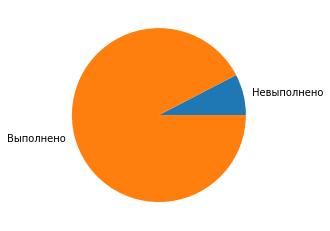

(0.9238845144356955, 0.07611548556430446)

In [153]:
c_score(data[:,6],7)

In [11]:
def c_all_scores(data):
    res_arr = []
    for i in range(long):
        scores = np.array([x.split(')')[i][0] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [12]:
c_all_scores(data[:,6])

[(0.9675196850393701, 0.03248031496062992),
 (0.9471784776902887, 0.05282152230971129),
 (0.9445538057742782, 0.055446194225721786),
 (0.9425853018372703, 0.057414698162729656),
 (0.9645669291338582, 0.03543307086614173),
 (0.9744094488188977, 0.025590551181102362),
 (0.9238845144356955, 0.07611548556430446),
 (0.8149606299212598, 0.18503937007874016),
 (0.8418635170603674, 0.15813648293963253),
 (0.8172572178477691, 0.18274278215223097),
 (0.97998687664042, 0.020013123359580054),
 (0.8454724409448819, 0.1545275590551181)]

4.	Сделайте анализ по двум школам:
a.	по всем выполненным заданиям типа В
b.	по заданиям типа С больше 50%
c.	по среднему балу юношей и девушек


In [156]:
data_sch_117 = data[data[:,1] == '117']
b_all_scores(data_sch_117[:,5])

[(0.9578947368421052, 0.042105263157894736),
 (0.8842105263157894, 0.11578947368421053),
 (0.8421052631578947, 0.15789473684210525),
 (0.8421052631578947, 0.15789473684210525),
 (0.5894736842105264, 0.4105263157894737),
 (0.9157894736842105, 0.08421052631578947),
 (0.968421052631579, 0.031578947368421054),
 (0.7789473684210526, 0.22105263157894736),
 (0.8105263157894737, 0.18947368421052632),
 (0.9789473684210527, 0.021052631578947368),
 (0.9473684210526316, 0.05263157894736842),
 (0.6736842105263158, 0.3263157894736842),
 (0.7789473684210526, 0.22105263157894736),
 (0.6526315789473685, 0.3473684210526316),
 (0.9473684210526316, 0.05263157894736842),
 (0.736842105263158, 0.2631578947368421),
 (0.7473684210526316, 0.25263157894736843),
 (0.736842105263158, 0.2631578947368421),
 (0.7157894736842105, 0.28421052631578947),
 (0.8526315789473684, 0.14736842105263157),
 (0.6105263157894737, 0.3894736842105263),
 (0.49473684210526314, 0.5052631578947369),
 (0.7263157894736842, 0.27368421052631

In [157]:
def c_more_than50(data):
    res_arr = []
    for i in range(12):
        maximum = int(int(data[0].split(')')[i][-1])/2)
        scores = np.array([int(x.split(')')[i][0]) for x in data])
        percent_good = (scores > maximum).sum()/scores.shape[0]
        res_arr.append((percent_good,1-percent_good))
    return res_arr

In [158]:
c_more_than50(data_sch_117[:,6])

[(0.9368421052631579, 0.06315789473684208),
 (0.7894736842105263, 0.21052631578947367),
 (0.9157894736842105, 0.08421052631578951),
 (0.7894736842105263, 0.21052631578947367),
 (0.6526315789473685, 0.34736842105263155),
 (0.17894736842105263, 0.8210526315789474),
 (0.7368421052631579, 0.26315789473684215),
 (0.5052631578947369, 0.49473684210526314),
 (0.3263157894736842, 0.6736842105263158),
 (0.12631578947368421, 0.8736842105263158),
 (0.9578947368421052, 0.04210526315789476),
 (0.8421052631578947, 0.1578947368421053)]

<AxesSubplot:ylabel='Density'>

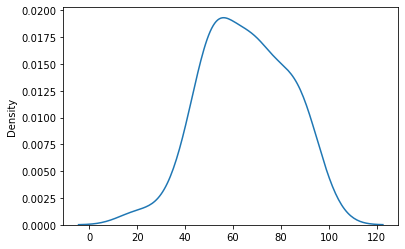

In [159]:
scores_man = data_sch_117[:,9][data_sch_117[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

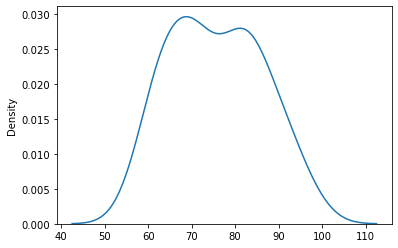

In [166]:
scores_woman = data_sch_117[:,9][data_sch_117[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [167]:
data_sch_147 = data[data[:,1] == '147']
b_all_scores(data_sch_147[:,5])

[(1.0, 0.0),
 (0.948051948051948, 0.05194805194805195),
 (0.935064935064935, 0.06493506493506493),
 (0.8441558441558441, 0.15584415584415584),
 (0.7142857142857143, 0.2857142857142857),
 (0.9567099567099567, 0.04329004329004329),
 (0.9783549783549783, 0.021645021645021644),
 (0.9264069264069263, 0.0735930735930736),
 (0.9134199134199135, 0.08658008658008658),
 (0.9826839826839827, 0.017316017316017316),
 (0.961038961038961, 0.03896103896103896),
 (0.8658008658008658, 0.1341991341991342),
 (0.9004329004329005, 0.09956709956709957),
 (0.8354978354978355, 0.1645021645021645),
 (0.9956709956709957, 0.004329004329004329),
 (0.8528138528138528, 0.1471861471861472),
 (0.8138528138528138, 0.18614718614718614),
 (0.8787878787878788, 0.12121212121212122),
 (0.7878787878787878, 0.21212121212121213),
 (0.9134199134199135, 0.08658008658008658),
 (0.8658008658008658, 0.1341991341991342),
 (0.5974025974025974, 0.4025974025974026),
 (0.8398268398268398, 0.16017316017316016),
 (0.38528138528138534, 0.6

In [168]:
c_more_than50(data_sch_147[:,6])

[(0.9913419913419913, 0.008658008658008698),
 (0.9264069264069265, 0.07359307359307354),
 (0.9783549783549783, 0.02164502164502169),
 (0.9567099567099567, 0.04329004329004327),
 (0.8225108225108225, 0.17748917748917747),
 (0.4805194805194805, 0.5194805194805194),
 (0.9437229437229437, 0.05627705627705626),
 (0.7965367965367965, 0.20346320346320346),
 (0.4935064935064935, 0.5064935064935066),
 (0.45454545454545453, 0.5454545454545454),
 (0.9956709956709957, 0.0043290043290042934),
 (0.9090909090909091, 0.09090909090909094)]

<AxesSubplot:ylabel='Density'>

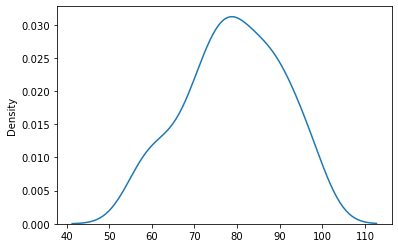

In [169]:
scores_man = data_sch_147[:,9][data_sch_147[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

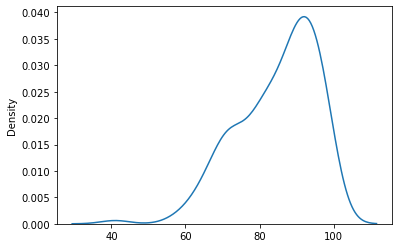

In [170]:
scores_woman = data_sch_147[:,9][data_sch_147[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [171]:
file = 'data/Вариант 2.csv'

In [172]:
import numpy as np
data = np.loadtxt(open(file,'rt').readlines()[:-1],skiprows = 3,delimiter = ',',dtype=(str))
data[:5]

array([['1', '124', '11', 'Ж', '341', '------+-----',
        '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '', '1', '5', '27'],
       ['2', '128', '11', 'Ж', '345', '-+----------',
        '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '', '1', '5', '27'],
       ['3', '132', '11', 'Ж', '340', '-+----------',
        '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '', '1', '5', '27'],
       ['4', '134', '11', 'Ж', '339', '-+----------',
        '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '', '1', '5', '27'],
       ['5', '136', '11', 'Ж', '348', '--------+---',
        '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '', '1', '5', '27']], dtype='<U28')

In [173]:
header = np.loadtxt(open(file,'rt').readlines()[:3],delimiter = ',',dtype=(str),skiprows = 0)
if 'Русский язык' in header[0][0]:
    grades = [23,56,71]
if 'Математика' in header[0][0]:
    grades = [24,46,64]
header

array([['02-Математика профильная', '', '', '', '', '', '', '', '', '',
        ''],
       ['', '', '', '', '', '', '', '', '', '', ''],
       ['№', '№ школы', 'Класс', 'Пол', 'Номер варианта',
        'Задания с кратким ответом', 'Задания с развёрнутым ответом',
        'Устная часть', 'Первичный балл', 'Балл', 'Минимальный балл']],
      dtype='<U29')

2.	Сделайте описательную статистику по набранному баллу

In [174]:
from scipy import stats

In [175]:
descriptive_stats = stats.describe(data[:,9].astype(int))
descriptive_stats

DescribeResult(nobs=2356, minmax=(5, 96), mean=49.25509337860781, variance=319.7094220294933, skewness=-0.055508484988738366, kurtosis=-0.857418877792655)

3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [176]:
data[data[:,9].astype(int)<descriptive_stats.mean].shape[0]/data.shape[0]

0.4800509337860781

4.	Найти процент учащихся не сдавших экзамен

In [177]:
bad_mark = data[data[:,9].astype(int)<data[:,10].astype(int)].shape[0]/data.shape[0]
bad_mark

0.09210526315789473

5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

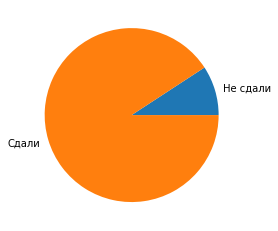

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie([bad_mark,1-bad_mark],labels = ['Не сдали','Сдали'])
plt.show()

6.	Постройте ядерную оценку плотности распределению баллов за экзамен

<AxesSubplot:ylabel='Density'>

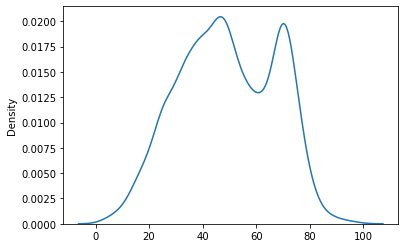

In [179]:
sns.kdeplot(data[:,9].astype(int))

7.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [180]:
scores = data[:,9].astype(int)
neud = (scores < grades[0]).sum()/scores.shape[0]
ud = ((scores > grades[0]) & (scores <= grades[1])).sum()/scores.shape[0]
hor = ((scores > grades[1]) & (scores <= grades[2])).sum()/scores.shape[0]
otl = (scores > grades[2]).sum()/scores.shape[0]

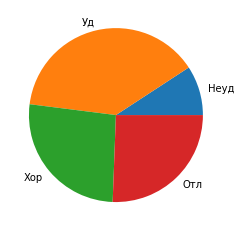

In [181]:
plt.pie([neud,ud,hor,otl],labels = ['Неуд','Уд','Хор','Отл'])
plt.show()

8.	Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [182]:
man = (data[:,3] =='М').sum()/data[:,3].shape[0]
woman = 1-man
man,woman

(0.47156196943972833, 0.5284380305602716)

9.	Сколько школ принимало участие в экзамене?

In [183]:
len(list(set(data[:,1].tolist())))

17

1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [184]:
mylen = np.vectorize(len)
short = mylen(data[:,5])[0]
short

12

In [185]:
long = int(mylen(data[:,6])[0]/4)
long

7

In [186]:
data[:,6]

array(['0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', ...,
       '2(2)1(2)2(2)1(3)3(3)4(4)2(4)', '2(2)2(2)2(2)0(3)3(3)4(4)2(4)',
       '2(2)2(2)2(2)0(3)3(3)4(4)2(4)'], dtype='<U28')

2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [187]:
def b_score(data,number):
    scores = np.array([x[number-1] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 2


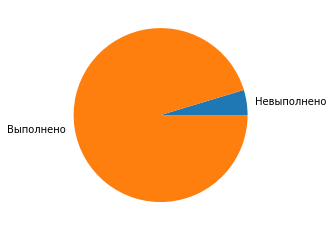

(0.9533106960950763, 0.0466893039049236)

In [188]:
b_score(data[:,5],2)

In [189]:
def b_all_scores(data):
    res_arr = []
    for i in range(short):
        scores = np.array([x[i] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [190]:
b_all_scores(data[:,5])

[(0.8926146010186757, 0.10738539898132428),
 (0.9533106960950763, 0.0466893039049236),
 (0.9278438030560272, 0.07215619694397284),
 (0.9100169779286927, 0.0899830220713073),
 (0.884974533106961, 0.11502546689303905),
 (0.7317487266553481, 0.26825127334465193),
 (0.37478777589134127, 0.6252122241086587),
 (0.47835314091680814, 0.5216468590831919),
 (0.9185059422750425, 0.08149405772495756),
 (0.7147707979626485, 0.28522920203735147),
 (0.5925297113752122, 0.4074702886247878),
 (0.46222410865874364, 0.5377758913412564)]

3.	Аналогично и с типом С (ответы с развернутым ответом)

In [191]:
def c_score(data,number):
    scores = np.array([x.split(')')[number-1][0] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {25 + number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 32


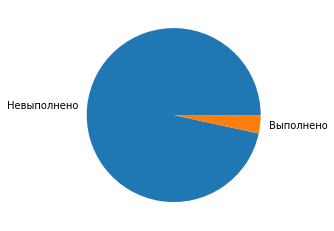

(0.03395585738539897, 0.966044142614601)

In [192]:
c_score(data[:,6],7)

In [193]:
def c_all_scores(data):
    res_arr = []
    for i in range(long):
        scores = np.array([x.split(')')[i][0] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [194]:
c_all_scores(data[:,6])

[(0.33913412563667233, 0.6608658743633277),
 (0.15874363327674024, 0.8412563667232598),
 (0.15577249575551788, 0.8442275042444821),
 (0.02716468590831922, 0.9728353140916808),
 (0.03395585738539897, 0.966044142614601),
 (0.011035653650254718, 0.9889643463497453),
 (0.03395585738539897, 0.966044142614601)]

4.	Сделайте анализ по двум школам:
a.	по всем выполненным заданиям типа В
b.	по заданиям типа С больше 50%
c.	по среднему балу юношей и девушек


In [198]:
data_sch_124 = data[data[:,1] == '124']
b_all_scores(data_sch_124[:,5])

[(0.8, 0.2),
 (0.8, 0.2),
 (0.7714285714285715, 0.22857142857142856),
 (0.8, 0.2),
 (0.7714285714285715, 0.22857142857142856),
 (0.6571428571428571, 0.34285714285714286),
 (0.22857142857142854, 0.7714285714285715),
 (0.4, 0.6),
 (0.9142857142857143, 0.08571428571428572),
 (0.4, 0.6),
 (0.4285714285714286, 0.5714285714285714),
 (0.22857142857142854, 0.7714285714285715)]

In [204]:
def c_more_than50(data):
    res_arr = []
    for i in range(long):
        maximum = int(int(data[0].split(')')[i][-1])/2)
        scores = np.array([int(x.split(')')[i][0]) for x in data])
        percent_good = (scores > maximum).sum()/scores.shape[0]
        res_arr.append((percent_good,1-percent_good))
    return res_arr

In [205]:
data_sch_124[:,6]

array(['0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
       '0(2)0(2)0(2)0(3)0(3)0(4)0(4)', '0(2)0(2)0(2)0(3)0(3)0(4)0(4)',
      

In [206]:
c_more_than50(data_sch_124[:,6])

[(0.08571428571428572, 0.9142857142857143),
 (0.0, 1.0),
 (0.02857142857142857, 0.9714285714285714),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0)]

<AxesSubplot:ylabel='Density'>

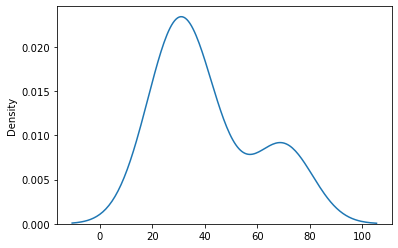

In [210]:
scores_man = data_sch_124[:,9][data_sch_124[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

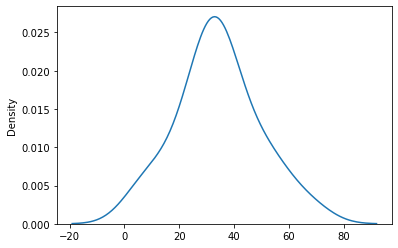

In [211]:
scores_woman = data_sch_124[:,9][data_sch_124[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [213]:
data_sch_136 = data[data[:,1] == '136']
b_all_scores(data_sch_136[:,5])

[(0.9029411764705882, 0.09705882352941177),
 (0.9647058823529412, 0.03529411764705882),
 (0.9470588235294117, 0.052941176470588235),
 (0.9107843137254902, 0.0892156862745098),
 (0.9049019607843137, 0.09509803921568627),
 (0.746078431372549, 0.25392156862745097),
 (0.42156862745098034, 0.5784313725490197),
 (0.4794117647058823, 0.5205882352941177),
 (0.9107843137254902, 0.0892156862745098),
 (0.7303921568627452, 0.2696078431372549),
 (0.611764705882353, 0.38823529411764707),
 (0.4852941176470589, 0.5147058823529411)]

In [214]:
c_more_than50(data_sch_136[:,6])

[(0.31862745098039214, 0.6813725490196079),
 (0.10392156862745099, 0.8960784313725491),
 (0.1696078431372549, 0.830392156862745),
 (0.00980392156862745, 0.9901960784313726),
 (0.028431372549019607, 0.9715686274509804),
 (0.00980392156862745, 0.9901960784313726),
 (0.000980392156862745, 0.9990196078431373)]

<AxesSubplot:ylabel='Density'>

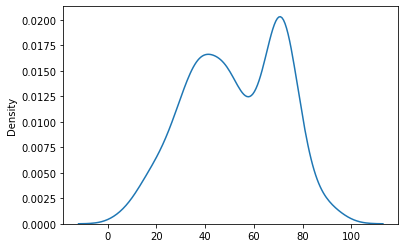

In [215]:
scores_man = data_sch_136[:,9][data_sch_136[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

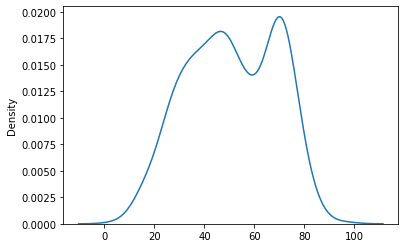

In [216]:
scores_woman = data_sch_136[:,9][data_sch_136[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [3]:
file = 'data/Вариант 3.csv'

In [4]:
import numpy as np
data = np.loadtxt(open(file,'rt').readlines()[:-1],skiprows = 3,delimiter = ',',dtype=(str))
data[:5]

array([['1', '152', '11', 'М', '333', '----001---00---000--1-+0---',
        '0(3)0(3)0(3)0(3)0(3)', '', '3', '10', '36'],
       ['2', '140', '12', 'Ж', '332', '----100---01-+-000--0--1---',
        '0(3)0(3)0(3)0(3)0(3)', '', '4', '14', '36'],
       ['3', '137', '11', 'М', '328', '--+-010---00---101--0--1---',
        '0(3)0(3)0(3)0(3)0(3)', '', '5', '17', '36'],
       ['4', '148', '11', 'М', '333', '-+--000--+01---100--0--1---',
        '0(3)0(3)0(3)0(3)0(3)', '', '5', '17', '36'],
       ['5', '153', '11', 'Ж', '333', '-+--100---00---100-+0--1---',
        '0(3)0(3)0(3)0(3)0(3)', '', '5', '17', '36']], dtype='<U27')

In [6]:
header = np.loadtxt(open(file,'rt').readlines()[:3],delimiter = ',',dtype=(str),skiprows = 0)
if 'Русский язык' in header[0][0]:
    grades = [23,56,71]
if 'Математика' in header[0][0]:
    grades = [24,46,64]    
if 'Физика' in header[0][0]:
    grades = [35,52,67]
if 'Информатика' in header[0][0]:
    grades = [23,56,71]
header

array([['03-Физика', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', ''],
       ['№', '№ школы', 'Класс', 'Пол', 'Номер варианта',
        'Задания с кратким ответом', 'Задания с развёрнутым ответом',
        'Устная часть', 'Первичный балл', 'Балл', 'Минимальный балл']],
      dtype='<U29')

2.	Сделайте описательную статистику по набранному баллу

In [7]:
from scipy import stats

In [8]:
descriptive_stats = stats.describe(data[:,9].astype(int))
descriptive_stats

DescribeResult(nobs=1180, minmax=(10, 100), mean=52.047457627118646, variance=223.96551515935656, skewness=0.5915053703516346, kurtosis=0.20711676474614205)

3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [9]:
data[data[:,9].astype(int)<descriptive_stats.mean].shape[0]/data.shape[0]

0.5627118644067797

4.	Найти процент учащихся не сдавших экзамен

In [10]:
bad_mark = data[data[:,9].astype(int)<data[:,10].astype(int)].shape[0]/data.shape[0]
bad_mark

0.07711864406779662

5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

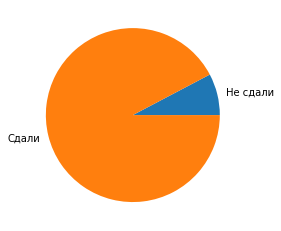

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie([bad_mark,1-bad_mark],labels = ['Не сдали','Сдали'])
plt.show()

6.	Постройте ядерную оценку плотности распределению баллов за экзамен

<AxesSubplot:ylabel='Density'>

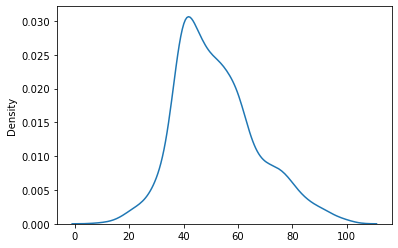

In [12]:
sns.kdeplot(data[:,9].astype(int))

7.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [13]:
scores = data[:,9].astype(int)
neud = (scores < grades[0]).sum()/scores.shape[0]
ud = ((scores > grades[0]) & (scores <= grades[1])).sum()/scores.shape[0]
hor = ((scores > grades[1]) & (scores <= grades[2])).sum()/scores.shape[0]
otl = (scores > grades[2]).sum()/scores.shape[0]

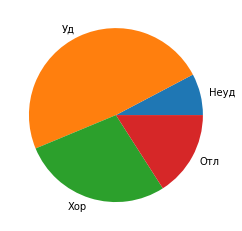

In [14]:
plt.pie([neud,ud,hor,otl],labels = ['Неуд','Уд','Хор','Отл'])
plt.show()

8.	Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [15]:
man = (data[:,3] =='М').sum()/data[:,3].shape[0]
woman = 1-man
man,woman

(0.6864406779661016, 0.31355932203389836)

9.	Сколько школ принимало участие в экзамене?

In [16]:
len(list(set(data[:,1].tolist())))

19

1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [17]:
mylen = np.vectorize(len)
short = mylen(data[:,5])[0]
short

27

In [18]:
long = int(mylen(data[:,6])[0]/4)
long

5

In [19]:
data[:,6]

array(['0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', ..., '3(3)3(3)3(3)2(3)3(3)',
       '3(3)3(3)3(3)3(3)3(3)', '3(3)3(3)3(3)3(3)3(3)'], dtype='<U27')

2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [20]:
def b_score(data,number):
    scores = np.array([x[number-1] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 2


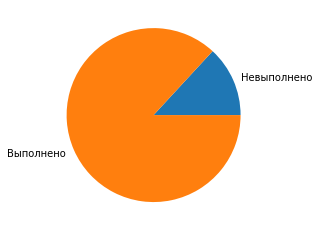

(0.8686440677966102, 0.13135593220338984)

In [21]:
b_score(data[:,5],2)

In [22]:
def b_all_scores(data):
    res_arr = []
    for i in range(short):
        scores = np.array([x[i] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [23]:
b_all_scores(data[:,5])

[(0.8533898305084746, 0.14661016949152542),
 (0.8686440677966102, 0.13135593220338984),
 (0.6220338983050848, 0.37796610169491524),
 (0.44491525423728817, 0.5550847457627118),
 (0.8296610169491525, 0.17033898305084746),
 (0.8288135593220339, 0.1711864406779661),
 (0.8093220338983051, 0.1906779661016949),
 (0.6559322033898305, 0.3440677966101695),
 (0.7398305084745762, 0.26016949152542374),
 (0.35, 0.65),
 (0.8381355932203389, 0.16186440677966102),
 (0.7533898305084745, 0.24661016949152542),
 (0.5661016949152542, 0.43389830508474575),
 (0.5101694915254238, 0.48983050847457626),
 (0.4254237288135593, 0.5745762711864407),
 (0.8186440677966101, 0.18135593220338983),
 (0.6728813559322033, 0.3271186440677966),
 (0.6059322033898304, 0.3940677966101695),
 (0.8194915254237288, 0.1805084745762712),
 (0.7508474576271187, 0.24915254237288137),
 (0.7940677966101695, 0.2059322033898305),
 (0.5076271186440677, 0.4923728813559322),
 (0.6203389830508474, 0.37966101694915255),
 (0.9610169491525423, 0.03

3.	Аналогично и с типом С (ответы с развернутым ответом)

In [24]:
def c_score(data,number):
    scores = np.array([x.split(')')[number-1][0] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {25 + number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 29


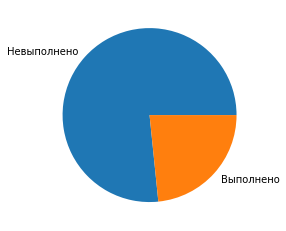

(0.23389830508474574, 0.7661016949152543)

In [27]:
c_score(data[:,6],4)

In [28]:
def c_all_scores(data):
    res_arr = []
    for i in range(long):
        scores = np.array([x.split(')')[i][0] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [29]:
c_all_scores(data[:,6])

[(0.17627118644067796, 0.823728813559322),
 (0.3822033898305085, 0.6177966101694915),
 (0.16355932203389834, 0.8364406779661017),
 (0.23389830508474574, 0.7661016949152543),
 (0.31779661016949157, 0.6822033898305084)]

4.	Сделайте анализ по двум школам:
a.	по всем выполненным заданиям типа В
b.	по заданиям типа С больше 50%
c.	по среднему балу юношей и девушек


In [33]:
data_sch_124 = data[data[:,1] == '152']
b_all_scores(data_sch_124[:,5])

[(0.8823529411764706, 0.11764705882352941),
 (0.8588235294117648, 0.1411764705882353),
 (0.6411764705882352, 0.3588235294117647),
 (0.45882352941176474, 0.5411764705882353),
 (0.8588235294117648, 0.1411764705882353),
 (0.8470588235294118, 0.15294117647058825),
 (0.8411764705882353, 0.1588235294117647),
 (0.6647058823529413, 0.3352941176470588),
 (0.7470588235294118, 0.2529411764705882),
 (0.34705882352941175, 0.6529411764705882),
 (0.8470588235294118, 0.15294117647058825),
 (0.7823529411764706, 0.21764705882352942),
 (0.611764705882353, 0.38823529411764707),
 (0.5588235294117647, 0.4411764705882353),
 (0.48235294117647054, 0.5176470588235295),
 (0.8823529411764706, 0.11764705882352941),
 (0.6764705882352942, 0.3235294117647059),
 (0.611764705882353, 0.38823529411764707),
 (0.8705882352941177, 0.12941176470588237),
 (0.7705882352941177, 0.22941176470588234),
 (0.7941176470588236, 0.20588235294117646),
 (0.5235294117647059, 0.4764705882352941),
 (0.6411764705882352, 0.3588235294117647),


In [34]:
def c_more_than50(data):
    res_arr = []
    for i in range(long):
        maximum = int(int(data[0].split(')')[i][-1])/2)
        scores = np.array([int(x.split(')')[i][0]) for x in data])
        percent_good = (scores > maximum).sum()/scores.shape[0]
        res_arr.append((percent_good,1-percent_good))
    return res_arr

In [35]:
data_sch_124[:,6]

array(['0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)1(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(3)0(3)0(3)0(3)0(3)', '0(3)0(3)0(3)0(3)0(3)',
       '0(

In [36]:
c_more_than50(data_sch_124[:,6])

[(0.07647058823529412, 0.9235294117647059),
 (0.3176470588235294, 0.6823529411764706),
 (0.15294117647058825, 0.8470588235294118),
 (0.047058823529411764, 0.9529411764705882),
 (0.27647058823529413, 0.7235294117647059)]

<AxesSubplot:ylabel='Density'>

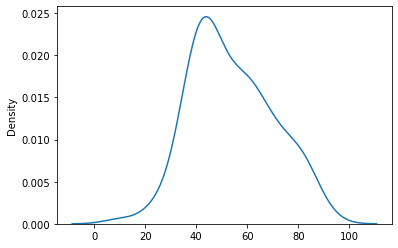

In [37]:
scores_man = data_sch_124[:,9][data_sch_124[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

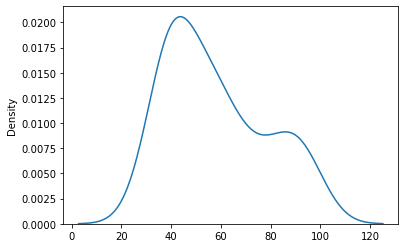

In [38]:
scores_woman = data_sch_124[:,9][data_sch_124[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [40]:
data_sch_136 = data[data[:,1] == '147']
b_all_scores(data_sch_136[:,5])

[(0.9850746268656716, 0.014925373134328358),
 (0.9402985074626866, 0.05970149253731343),
 (0.6417910447761195, 0.3582089552238806),
 (0.5522388059701493, 0.44776119402985076),
 (0.8805970149253731, 0.11940298507462686),
 (0.8955223880597015, 0.1044776119402985),
 (0.8955223880597015, 0.1044776119402985),
 (0.7164179104477613, 0.2835820895522388),
 (0.8656716417910448, 0.13432835820895522),
 (0.5074626865671642, 0.4925373134328358),
 (0.9402985074626866, 0.05970149253731343),
 (0.835820895522388, 0.16417910447761194),
 (0.6716417910447761, 0.3283582089552239),
 (0.6417910447761195, 0.3582089552238806),
 (0.6268656716417911, 0.373134328358209),
 (0.8059701492537313, 0.19402985074626866),
 (0.7014925373134329, 0.29850746268656714),
 (0.6865671641791045, 0.31343283582089554),
 (0.8955223880597015, 0.1044776119402985),
 (0.8208955223880597, 0.1791044776119403),
 (0.9104477611940298, 0.08955223880597014),
 (0.6865671641791045, 0.31343283582089554),
 (0.7014925373134329, 0.29850746268656714),

In [41]:
c_more_than50(data_sch_136[:,6])

[(0.13432835820895522, 0.8656716417910448),
 (0.373134328358209, 0.6268656716417911),
 (0.11940298507462686, 0.8805970149253731),
 (0.05970149253731343, 0.9402985074626866),
 (0.3283582089552239, 0.6716417910447761)]

<AxesSubplot:ylabel='Density'>

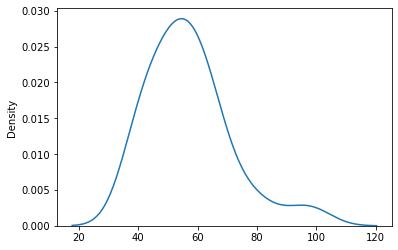

In [42]:
scores_man = data_sch_136[:,9][data_sch_136[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

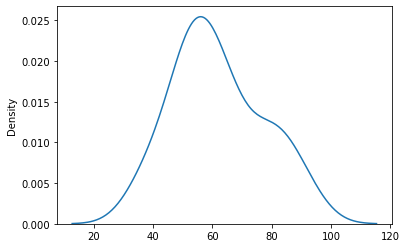

In [43]:
scores_woman = data_sch_136[:,9][data_sch_136[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [45]:
file = 'data/Вариант 4.csv'

In [46]:
import numpy as np
data = np.loadtxt(open(file,'rt').readlines()[:-1],skiprows = 3,delimiter = ',',dtype=(str))
data[:5]

array([['1', '148', '13', 'М', '505', '-----------------------',
        '0(3)0(2)0(3)0(4)', '', '0', '0', '40'],
       ['2', '147', '11', 'М', '328', '-----------------------',
        '0(3)0(2)0(3)0(4)', '', '0', '0', '40'],
       ['3', '111', '11', 'М', '330', '---+---+-+-------------',
        '0(3)0(2)0(3)0(4)', '', '3', '20', '40'],
       ['4', '140', '11', 'М', '328', '---+---------++--------',
        '0(3)0(2)0(3)0(4)', '', '3', '20', '40'],
       ['5', '148', '11', 'М', '328', '----+---------+-----+--',
        '0(3)0(2)0(3)0(4)', '', '3', '20', '40']], dtype='<U23')

In [47]:
header = np.loadtxt(open(file,'rt').readlines()[:3],delimiter = ',',dtype=(str),skiprows = 0)
if 'Русский язык' in header[0][0]:
    grades = [23,56,71]
if 'Математика' in header[0][0]:
    grades = [24,46,64]    
if 'Физика' in header[0][0]:
    grades = [35,52,67]
if 'Информатика' in header[0][0]:
    grades = [23,56,71]
header

array([['05-Информатика и ИКТ', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '', ''],
       ['№', '№ школы', 'Класс', 'Пол', 'Номер варианта',
        'Задания с кратким ответом', 'Задания с развёрнутым ответом',
        'Устная часть', 'Первичный балл', 'Балл', 'Минимальный балл']],
      dtype='<U29')

2.	Сделайте описательную статистику по набранному баллу

In [48]:
from scipy import stats

In [49]:
descriptive_stats = stats.describe(data[:,9].astype(int))
descriptive_stats

DescribeResult(nobs=141, minmax=(0, 100), mean=60.780141843971634, variance=377.1298885511651, skewness=-0.5896342992506792, kurtosis=0.3739909052697099)

3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [50]:
data[data[:,9].astype(int)<descriptive_stats.mean].shape[0]/data.shape[0]

0.46099290780141844

4.	Найти процент учащихся не сдавших экзамен

In [51]:
bad_mark = data[data[:,9].astype(int)<data[:,10].astype(int)].shape[0]/data.shape[0]
bad_mark

0.11347517730496454

5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

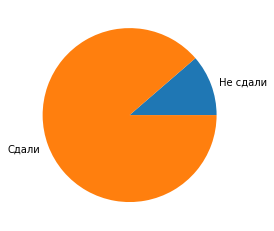

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie([bad_mark,1-bad_mark],labels = ['Не сдали','Сдали'])
plt.show()

6.	Постройте ядерную оценку плотности распределению баллов за экзамен

<AxesSubplot:ylabel='Density'>

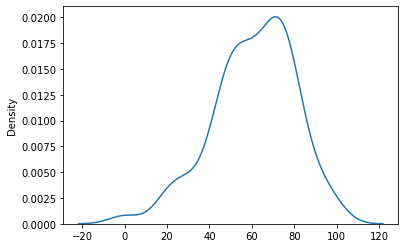

In [53]:
sns.kdeplot(data[:,9].astype(int))

7.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [54]:
scores = data[:,9].astype(int)
neud = (scores < grades[0]).sum()/scores.shape[0]
ud = ((scores > grades[0]) & (scores <= grades[1])).sum()/scores.shape[0]
hor = ((scores > grades[1]) & (scores <= grades[2])).sum()/scores.shape[0]
otl = (scores > grades[2]).sum()/scores.shape[0]

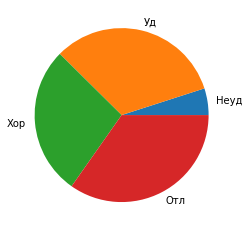

In [55]:
plt.pie([neud,ud,hor,otl],labels = ['Неуд','Уд','Хор','Отл'])
plt.show()

8.	Какое процентное соотношение юношей и девушек писало данный экзамен? 

In [56]:
man = (data[:,3] =='М').sum()/data[:,3].shape[0]
woman = 1-man
man,woman

(0.7730496453900709, 0.22695035460992907)

9.	Сколько школ принимало участие в экзамене?

In [57]:
len(list(set(data[:,1].tolist())))

10

1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [58]:
mylen = np.vectorize(len)
short = mylen(data[:,5])[0]
short

23

In [59]:
long = int(mylen(data[:,6])[0]/4)
long

4

In [60]:
data[:,6]

array(['0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)1(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '2(3)0(2)0(3)0(4)', '1(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)',
       '1(3)1(2)0(3)1(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)1(3)0(4)',
       '1(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '2(3)0(2)1(3)0(4)',
       '0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)1(3)0(4)',
       '2(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '1(3)0(2)0(3)0(4)',
       '2(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '2(3)0(2)0(3)0(4)',
       '0(3)0(2)0(3)0(4)', '2(3)2(2)1(3)0(4)', '0(3)0(2)1(3)0(

2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 

In [61]:
def b_score(data,number):
    scores = np.array([x[number-1] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 2


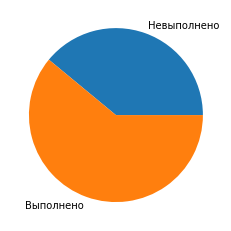

(0.6099290780141844, 0.3900709219858156)

In [62]:
b_score(data[:,5],2)

In [63]:
def b_all_scores(data):
    res_arr = []
    for i in range(short):
        scores = np.array([x[i] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [64]:
b_all_scores(data[:,5])

[(0.8156028368794326, 0.18439716312056736),
 (0.6099290780141844, 0.3900709219858156),
 (0.7943262411347518, 0.20567375886524822),
 (0.7872340425531915, 0.2127659574468085),
 (0.6808510638297872, 0.3191489361702128),
 (0.6170212765957447, 0.3829787234042553),
 (0.9219858156028369, 0.07801418439716312),
 (0.8652482269503546, 0.1347517730496454),
 (0.4964539007092199, 0.5035460992907801),
 (0.5957446808510638, 0.40425531914893614),
 (0.43262411347517726, 0.5673758865248227),
 (0.5390070921985816, 0.46099290780141844),
 (0.6099290780141844, 0.3900709219858156),
 (0.7659574468085106, 0.23404255319148937),
 (0.7163120567375887, 0.28368794326241137),
 (0.624113475177305, 0.375886524822695),
 (0.6808510638297872, 0.3191489361702128),
 (0.3120567375886525, 0.6879432624113475),
 (0.6808510638297872, 0.3191489361702128),
 (0.12765957446808507, 0.8723404255319149),
 (0.34042553191489366, 0.6595744680851063),
 (0.36879432624113473, 0.6312056737588653),
 (0.17730496453900713, 0.8226950354609929)]

3.	Аналогично и с типом С (ответы с развернутым ответом)

In [65]:
def c_score(data,number):
    scores = np.array([x.split(')')[number-1][0] for x in data])
    percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
    print(f'Номер задания {25 + number}')
    plt.pie([percent_bad,1-percent_bad],labels = ['Невыполнено','Выполнено'])
    plt.show()
    return 1-percent_bad,percent_bad

Номер задания 29


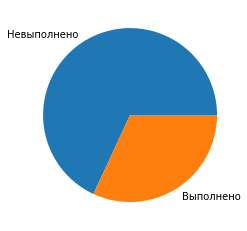

(0.3191489361702128, 0.6808510638297872)

In [66]:
c_score(data[:,6],4)

In [67]:
def c_all_scores(data):
    res_arr = []
    for i in range(long):
        scores = np.array([x.split(')')[i][0] for x in data])
        percent_bad = ((scores =='-')|(scores =='0')).sum()/scores.shape[0]
        res_arr.append((1-percent_bad,percent_bad))
    return res_arr

In [68]:
c_all_scores(data[:,6])

[(0.6595744680851063, 0.3404255319148936),
 (0.475177304964539, 0.524822695035461),
 (0.5602836879432624, 0.4397163120567376),
 (0.3191489361702128, 0.6808510638297872)]

4.	Сделайте анализ по двум школам:
a.	по всем выполненным заданиям типа В
b.	по заданиям типа С больше 50%
c.	по среднему балу юношей и девушек


In [75]:
data_sch_124 = data[data[:,1] == '147']
b_all_scores(data_sch_124[:,5])

[(0.8333333333333334, 0.16666666666666666),
 (0.6666666666666667, 0.3333333333333333),
 (0.8333333333333334, 0.16666666666666666),
 (0.5, 0.5),
 (0.33333333333333337, 0.6666666666666666),
 (0.5, 0.5),
 (0.8333333333333334, 0.16666666666666666),
 (0.8333333333333334, 0.16666666666666666),
 (0.5, 0.5),
 (0.33333333333333337, 0.6666666666666666),
 (0.16666666666666663, 0.8333333333333334),
 (0.5, 0.5),
 (0.5, 0.5),
 (0.6666666666666667, 0.3333333333333333),
 (0.5, 0.5),
 (0.33333333333333337, 0.6666666666666666),
 (0.5, 0.5),
 (0.33333333333333337, 0.6666666666666666),
 (0.5, 0.5),
 (0.16666666666666663, 0.8333333333333334),
 (0.16666666666666663, 0.8333333333333334),
 (0.16666666666666663, 0.8333333333333334),
 (0.16666666666666663, 0.8333333333333334)]

In [76]:
def c_more_than50(data):
    res_arr = []
    for i in range(long):
        maximum = int(int(data[0].split(')')[i][-1])/2)
        scores = np.array([int(x.split(')')[i][0]) for x in data])
        percent_good = (scores > maximum).sum()/scores.shape[0]
        res_arr.append((percent_good,1-percent_good))
    return res_arr

In [77]:
data_sch_124[:,6]

array(['0(3)0(2)0(3)0(4)', '0(3)0(2)0(3)0(4)', '0(3)0(2)1(3)0(4)',
       '2(3)0(2)0(3)0(4)', '3(3)1(2)0(3)0(4)', '3(3)2(2)2(3)4(4)'],
      dtype='<U23')

In [78]:
c_more_than50(data_sch_124[:,6])

[(0.5, 0.5),
 (0.16666666666666666, 0.8333333333333334),
 (0.16666666666666666, 0.8333333333333334),
 (0.16666666666666666, 0.8333333333333334)]

<AxesSubplot:ylabel='Density'>

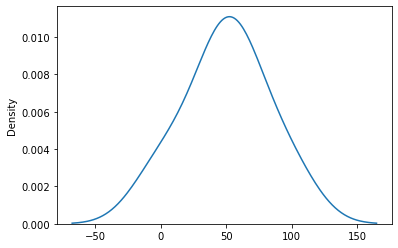

In [79]:
scores_man = data_sch_124[:,9][data_sch_124[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:>

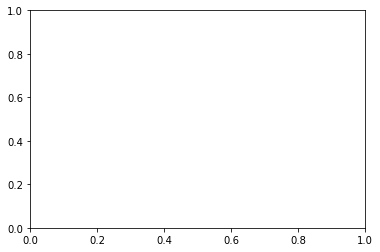

In [81]:
scores_woman = data_sch_124[:,9][data_sch_124[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))

In [82]:
(data_sch_124[:,3]=='Ж').sum()

0

In [84]:
data_sch_136 = data[data[:,1] == '148']
b_all_scores(data_sch_136[:,5])

[(0.8064516129032258, 0.1935483870967742),
 (0.6236559139784946, 0.3763440860215054),
 (0.7419354838709677, 0.25806451612903225),
 (0.7956989247311828, 0.20430107526881722),
 (0.7096774193548387, 0.2903225806451613),
 (0.6559139784946236, 0.34408602150537637),
 (0.935483870967742, 0.06451612903225806),
 (0.8817204301075269, 0.11827956989247312),
 (0.5806451612903225, 0.41935483870967744),
 (0.6129032258064516, 0.3870967741935484),
 (0.4731182795698925, 0.5268817204301075),
 (0.5591397849462365, 0.44086021505376344),
 (0.6129032258064516, 0.3870967741935484),
 (0.8172043010752688, 0.1827956989247312),
 (0.7311827956989247, 0.26881720430107525),
 (0.6559139784946236, 0.34408602150537637),
 (0.7311827956989247, 0.26881720430107525),
 (0.3548387096774194, 0.6451612903225806),
 (0.7311827956989247, 0.26881720430107525),
 (0.13978494623655913, 0.8602150537634409),
 (0.3870967741935484, 0.6129032258064516),
 (0.4086021505376344, 0.5913978494623656),
 (0.17204301075268813, 0.8279569892473119)]

In [85]:
c_more_than50(data_sch_136[:,6])

[(0.6666666666666666, 0.33333333333333337),
 (0.3978494623655914, 0.6021505376344086),
 (0.43010752688172044, 0.5698924731182795),
 (0.08602150537634409, 0.9139784946236559)]

<AxesSubplot:ylabel='Density'>

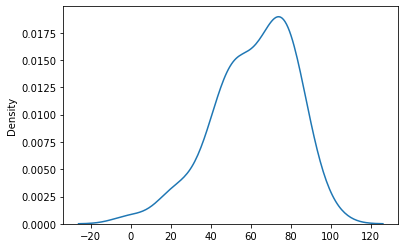

In [86]:
scores_man = data_sch_136[:,9][data_sch_136[:,3]=='М'].astype(int)
sns.kdeplot(scores_man.astype(int))

<AxesSubplot:ylabel='Density'>

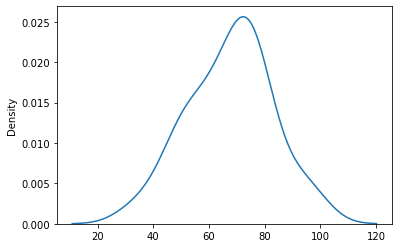

In [87]:
scores_woman = data_sch_136[:,9][data_sch_136[:,3]=='Ж'].astype(int)
sns.kdeplot(scores_woman.astype(int))